# Representing text for Machine-learning

A long document made up of words is not a good representation for computers.

We need to convert the text into a better representation. Here we will look at
some baseline methods that work very well in practice. They also form the basis
of more complicated ideas used later on. Strong baselines are important in a world
of deep learning. You have to be able to demosntrate that the additional complexity,
reduced explainability, and additional technical debt from using deep learning is
worth it.

In [1]:
sentences = ["The Uber driver behind the wheel of an autonomous car that hit "
             "and killed a pedestrian in Arizona could have avoided the collision "
             "if she had not been distracted, according to police investigating "
             "the incident.",
             "An avoidability analysis by police in Tempe, Arizona following March's"
             " crash suggested that Rafaela Vasquez, Uber's safety driver, may have "
             "been watching the online video service Hulu in the car.",
             "The death of 49-year-old Elaine Herzberg is believed to be the first "
             "time an autonomous car has killed a bystander, prompting a series of "
             "investigations into what happened.",
            ]

In [2]:
# create a bag of words representation of the above sentences

In [3]:
import numpy as np

word2idx = {}
for sentence in sentences:
    for word in sentence.split():
        word = word.lower()
        if word not in word2idx:
            word2idx[word] = len(word2idx)

X = np.zeros((len(sentences), len(word2idx)))

for i,sentence in enumerate(sentences):
    for word in sentence.lower().split():
        idx = word2idx[word]
        X[i,idx] += 1

In [4]:
X

array([[4., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [2., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 2.,
        1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [2., 0., 0., 0., 0., 2., 1., 1., 1., 0., 0., 0., 1., 2., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1.]])

In [5]:
# check that you can undo your bag of words

In [6]:
idx2word = dict([(word2idx[w], w) for w in word2idx])

In [7]:
for x in X:
    bag_of_words = []
    for i in range(X.shape[1]):
        if x[i] > 0:
            bag_of_words.append(idx2word[i])
            
    print(bag_of_words)

['the', 'uber', 'driver', 'behind', 'wheel', 'of', 'an', 'autonomous', 'car', 'that', 'hit', 'and', 'killed', 'a', 'pedestrian', 'in', 'arizona', 'could', 'have', 'avoided', 'collision', 'if', 'she', 'had', 'not', 'been', 'distracted,', 'according', 'to', 'police', 'investigating', 'incident.']
['the', 'an', 'that', 'in', 'arizona', 'have', 'been', 'police', 'avoidability', 'analysis', 'by', 'tempe,', 'following', "march's", 'crash', 'suggested', 'rafaela', 'vasquez,', "uber's", 'safety', 'driver,', 'may', 'watching', 'online', 'video', 'service', 'hulu', 'car.']
['the', 'of', 'an', 'autonomous', 'car', 'killed', 'a', 'to', 'death', '49-year-old', 'elaine', 'herzberg', 'is', 'believed', 'be', 'first', 'time', 'has', 'bystander,', 'prompting', 'series', 'investigations', 'into', 'what', 'happened.']


In [8]:
# what fraction of entries are not zero in X?

In [9]:
(X>0).sum(axis=1) / X.shape[1]

array([0.46376812, 0.4057971 , 0.36231884])

## Using ready made tools for this

scikit-learn has tools to do this for you.

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()
# learn the mapping from words to integers
vect.fit(sentences)
print(sorted(vect.get_feature_names()))

['49', 'according', 'an', 'analysis', 'and', 'arizona', 'autonomous', 'avoidability', 'avoided', 'be', 'been', 'behind', 'believed', 'by', 'bystander', 'car', 'collision', 'could', 'crash', 'death', 'distracted', 'driver', 'elaine', 'first', 'following', 'had', 'happened', 'has', 'have', 'herzberg', 'hit', 'hulu', 'if', 'in', 'incident', 'into', 'investigating', 'investigations', 'is', 'killed', 'march', 'may', 'not', 'of', 'old', 'online', 'pedestrian', 'police', 'prompting', 'rafaela', 'safety', 'series', 'service', 'she', 'suggested', 'tempe', 'that', 'the', 'time', 'to', 'uber', 'vasquez', 'video', 'watching', 'what', 'wheel', 'year']


In [11]:
# use the learnt mapping to convert sentences to bag of words
X_sk = vect.transform(sentences)

In [12]:
vect.inverse_transform(X_sk)

[array(['according', 'an', 'and', 'arizona', 'autonomous', 'avoided',
        'been', 'behind', 'car', 'collision', 'could', 'distracted',
        'driver', 'had', 'have', 'hit', 'if', 'in', 'incident',
        'investigating', 'killed', 'not', 'of', 'pedestrian', 'police',
        'she', 'that', 'the', 'to', 'uber', 'wheel'], dtype='<U14'),
 array(['an', 'analysis', 'arizona', 'avoidability', 'been', 'by', 'car',
        'crash', 'driver', 'following', 'have', 'hulu', 'in', 'march',
        'may', 'online', 'police', 'rafaela', 'safety', 'service',
        'suggested', 'tempe', 'that', 'the', 'uber', 'vasquez', 'video',
        'watching'], dtype='<U14'),
 array(['49', 'an', 'autonomous', 'be', 'believed', 'bystander', 'car',
        'death', 'elaine', 'first', 'happened', 'has', 'herzberg', 'into',
        'investigations', 'is', 'killed', 'of', 'old', 'prompting',
        'series', 'the', 'time', 'to', 'what', 'year'], dtype='<U14')]

In [13]:
X.shape, X_sk.shape

((3, 69), (3, 67))

In [14]:
# why is there a difference between what `CountVectorizer` says how many features
# there are and your code?

In [15]:
print(sorted(word2idx.keys()))

['49-year-old', 'a', 'according', 'an', 'analysis', 'and', 'arizona', 'autonomous', 'avoidability', 'avoided', 'be', 'been', 'behind', 'believed', 'by', 'bystander,', 'car', 'car.', 'collision', 'could', 'crash', 'death', 'distracted,', 'driver', 'driver,', 'elaine', 'first', 'following', 'had', 'happened.', 'has', 'have', 'herzberg', 'hit', 'hulu', 'if', 'in', 'incident.', 'into', 'investigating', 'investigations', 'is', 'killed', "march's", 'may', 'not', 'of', 'online', 'pedestrian', 'police', 'prompting', 'rafaela', 'safety', 'series', 'service', 'she', 'suggested', 'tempe,', 'that', 'the', 'time', 'to', 'uber', "uber's", 'vasquez,', 'video', 'watching', 'what', 'wheel']


## Classify movies from their reviews

Fetch the dataset from http://ai.stanford.edu/~amaas/data/sentiment/ and un'tar it to
a directory near to this notebook. I placed it in `../data/`.

In [16]:
from sklearn.datasets import load_files

reviews_train = load_files("../data/aclImdb/train/", categories=['neg', 'pos'])

text_trainval, y_trainval = reviews_train.data, reviews_train.target

print("type of text_train: {}".format(type(text_trainval)))
print("length of text_train: {}".format(len(text_trainval)))
print("class balance: {}".format(np.bincount(y_trainval)))

type of text_train: <class 'list'>
length of text_train: 25000
class balance: [12500 12500]


In [17]:
print("classes: {}".format(set(y_trainval)))

classes: {0, 1}


In [18]:
# look at an example review
print("text_train[42]:\n{}".format(text_trainval[42].decode()))

text_train[42]:
I swear I could watch this movie every weekend of my life and never get sick of it! Every aspect of human emotion is captured so magically by the acting, the script, the direction, and the general feeling of this movie. It's been a long time since I saw a movie that actually made me choke from laughter, reflect from sadness, and feel each intended feeling that comes through in this most excellent work! We need MORE MOVIES like this!!! Mike Binder: are you listening???


In [19]:
# Vectorise!
from sklearn.model_selection import train_test_split


text_trainval = [doc.replace(b"<br />", b" ") for doc in text_trainval]

text_train, text_val, y_train, y_val = train_test_split(
    text_trainval, y_trainval, stratify=y_trainval, random_state=0)

vect = CountVectorizer()
X_train = vect.fit_transform(text_train)
# Note that we learn the mapping from the training only!
# this is key! This is why it pays to use existing tools
# as they can deal with words which are missing from the
# map (out of vocabulary words).
X_val = vect.transform(text_val)
X_train

<18750x66651 sparse matrix of type '<class 'numpy.int64'>'
	with 2569474 stored elements in Compressed Sparse Row format>

In [20]:
# check out some of the words
feature_names = vect.get_feature_names()
print(feature_names[:10])
print(feature_names[30000:30010])
print(feature_names[::3000])

['00', '000', '0000000000001', '00001', '00015', '000s', '001', '003830', '006', '007']
['inhumanities', 'inhumanity', 'inhumanly', 'inian', 'inigo', 'inimitable', 'inish', 'initial', 'initialize', 'initially']
['00', 'animating', 'belting', 'cali', 'commas', 'debutante', 'druids', 'fai', 'gathering', 'heared', 'inhumanities', 'kookoo', 'makes', 'moratorium', 'organ', 'poise', 'rebours', 'salute', 'skinkons', 'subordinated', 'tools', 'validity', 'yanks']


In [21]:
# fit a logistic regression model to the data and measure the performance
# of the model. We now have a baseline we need to improve on.
# Once you have your model running tune the regularisation strength `C`
# using RandomSearchCV or LogisticRegressionCV which is more efficient
# Use scikit-learn for this

In [22]:
from sklearn.linear_model import LogisticRegressionCV

lr = LogisticRegressionCV().fit(X_train, y_train)

In [23]:
lr.score(X_val, y_val)

0.88096

In [24]:
# Find out which words correlate with a good and a bad review.
# You can inspect the weights of the linear model by looking
# at the coefs_ property of your LogisticRegression instance
# do they seem sensible? Could you explain why a review is
# getting a high or a low predicted sentiment?

In [25]:
%matplotlib inline

In [26]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14

In [27]:
import numpy as np


def plot_important_features(coef, feature_names, top_n=20, ax=None, rotation=90):
    if ax is None:
        ax = plt.gca()
    inds = np.argsort(coef)
    low = inds[:top_n]
    high = inds[-top_n:]
    important = np.hstack([low, high])
    myrange = range(len(important))
    colors = ['red'] * top_n + ['blue'] * top_n
    
    ax.bar(myrange, coef[important], color=colors)
    ax.set_xticks(myrange)
    ax.set_xticklabels(feature_names[important], rotation=rotation, ha="center")
    ax.set_xlim(-.7, 2 * top_n)
    #ax.set_frame_on(False)

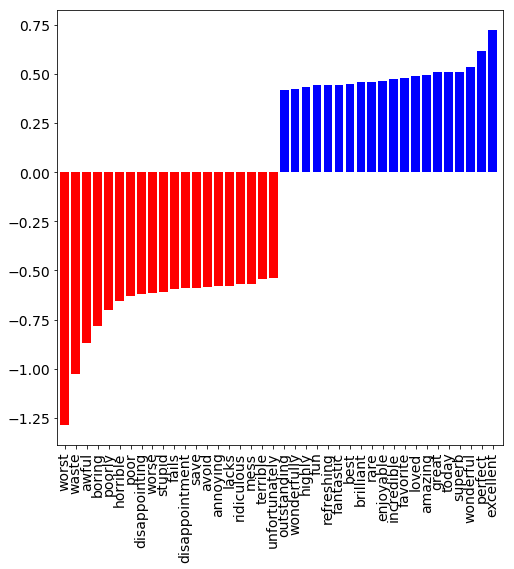

In [28]:
plot_important_features(lr.coef_.ravel(),
                        np.array(feature_names))

## Bonus

* investigate how to configure the vectorizer to exclude stop words
* should you fix the spelling of misspelt words?
* only include words that appear more than N times?
* only include the M most frequent words?
* how few examples do you need to achieve a "good" performance?
* a bag of words does not know anything about the order of words,
  can you construct bi-grams (pairs of words) and improve the
  performance?
* construct a logistic regression model in keras and use that instead
  of using scikit-learn's implementation


# Term frequency, inverse document frequency

Instead of counting how often a word appears we can also use TfIdf.

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline


text_classifier = make_pipeline(
    TfidfVectorizer(min_df=3, max_df=0.8, ngram_range=(1, 2)),
    LogisticRegression(),
)

In [30]:
%%time
text_classifier.fit(text_train, y_train)

CPU times: user 20.5 s, sys: 1.44 s, total: 22 s
Wall time: 18.7 s


Pipeline(memory=None,
     steps=[('tfidfvectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.8, max_features=None, min_df=3,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_i...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [31]:
text_classifier.score(text_val, y_val)

0.88496

## Baseline results

With about 20s of computer time and a few minutes of work we are at 88% accuracy.

We have not really tuned this baseline yet, it is possible that some investment in 
finding better hyperparamters will improve the baseline further. Try it out.